# Horizontal and Vertical Shift Augmentation

In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

from matplotlib import pyplot
import matplotlib.image as mpimg

import numpy as np
import cv2
import os

# Load Data

In [ ]:
base_dir = '/home/samuel/Dev/Python/Neural Networks/covid_net/COVID-Net/data'
train_dir = os.path.join(base_dir, 'train')
training_set = os.listdir(train_dir)

# Random ...

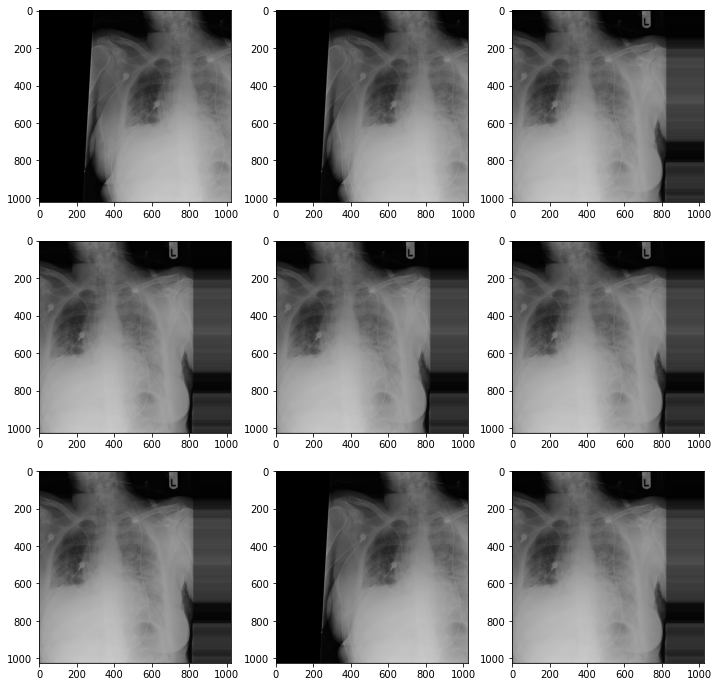

In [ ]:

image_name = np.random.choice(training_set)

img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-200,200])
datagen.fit(samples)
it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()


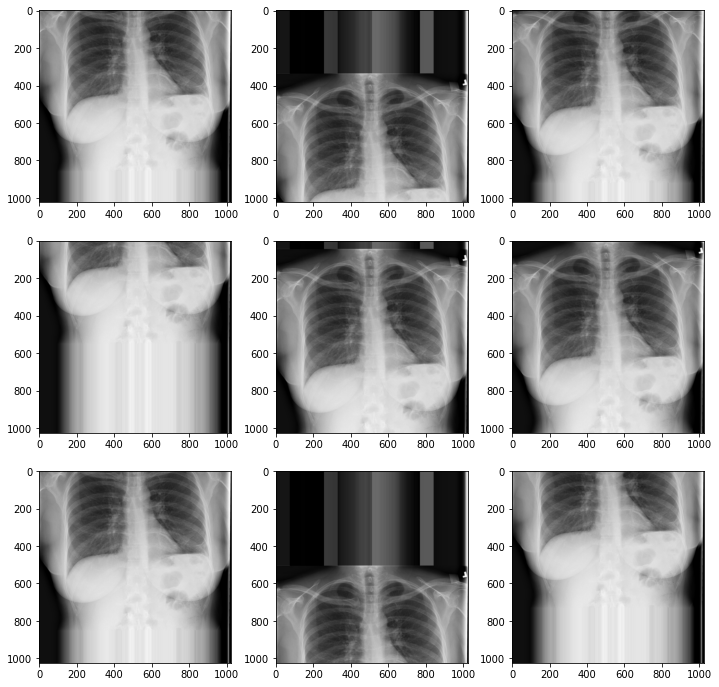

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))
for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Horizontal and Vertical Flip Augmentation

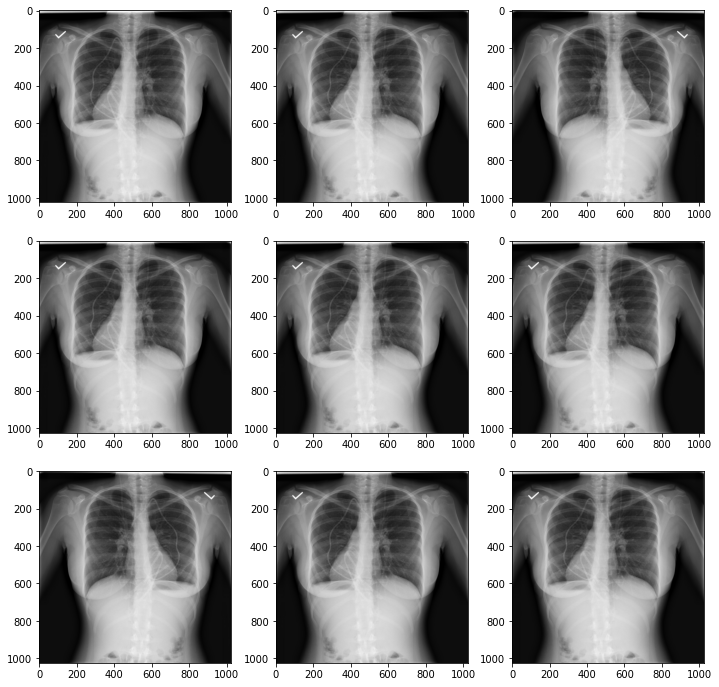

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Rotation Augmentation

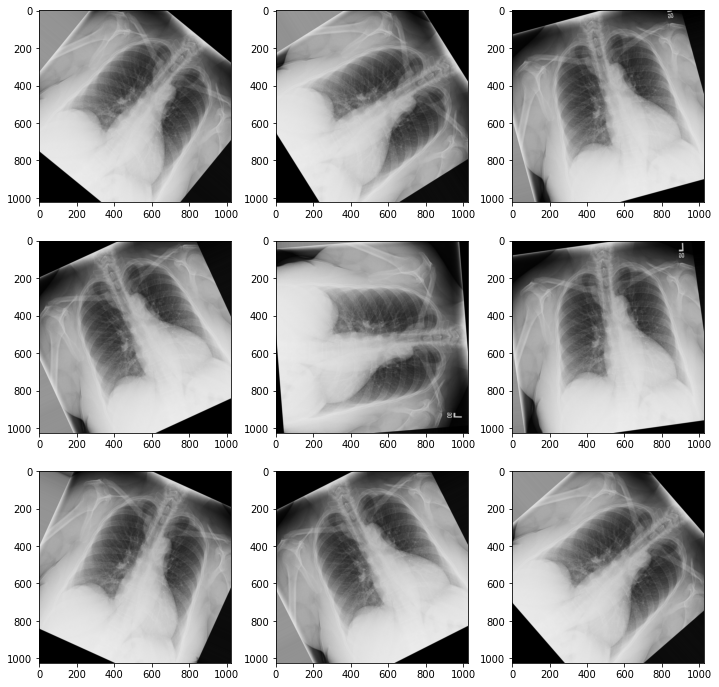

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Brightness Augmentation

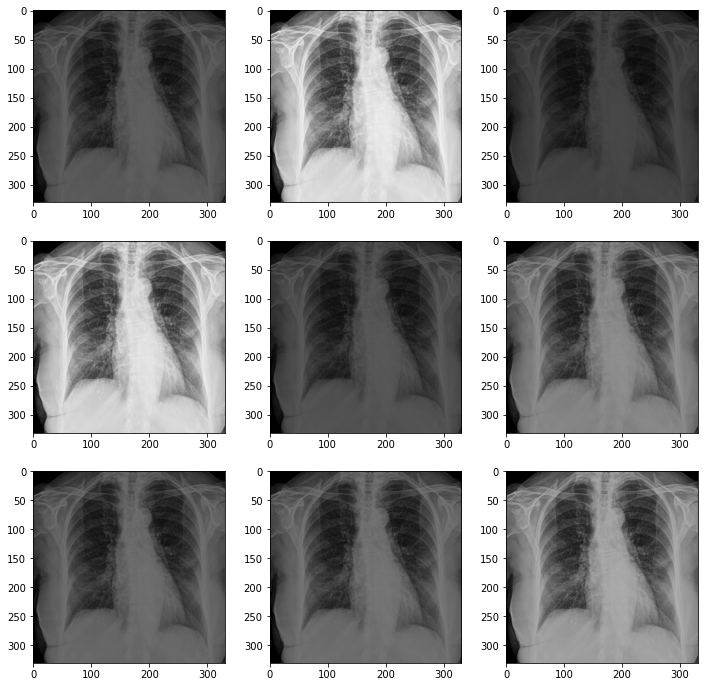

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Random Zoom Augmentation

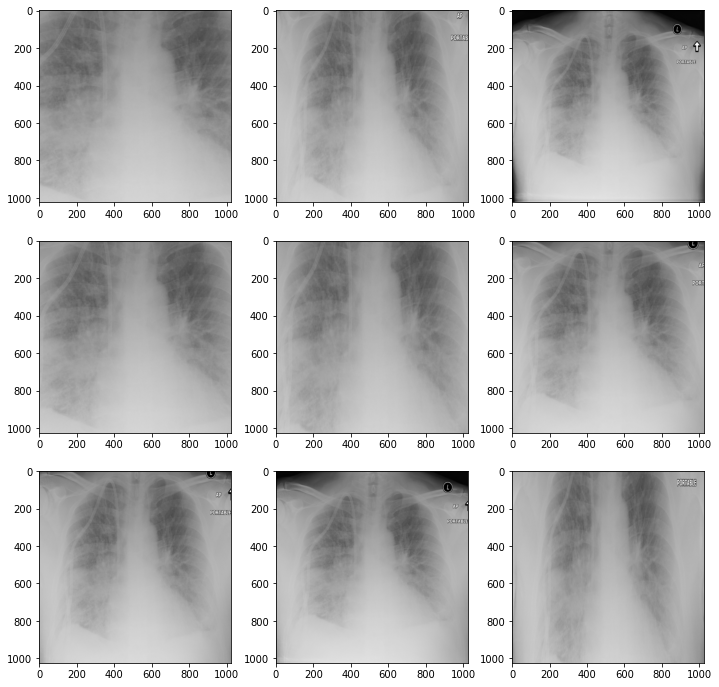

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
datagen.fit(samples)

it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Feature Wise Center


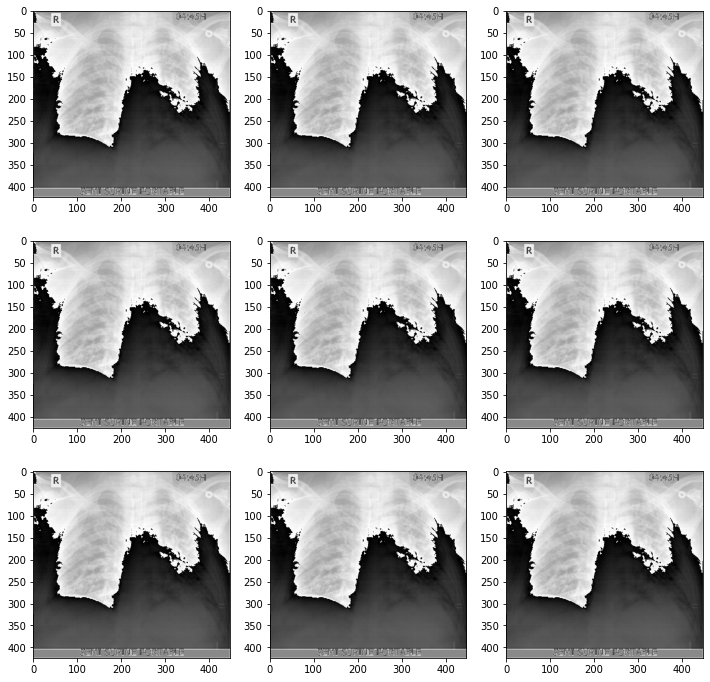

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))
data = img_to_array(img)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(samples)
it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(12, 12))

for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()

# Gaussian Noise

In [ ]:

def gaussian_noise(basedir, imgpath):
    
    img = cv2.imread(os.path.join(basedir, imgpath), cv2.IMREAD_COLOR)   
    gauss = np.random.normal(0, 0.8, img.size)
    gauss = gauss.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
    imgnoise = cv2.add(img, gauss)

    return imgnoise


# Sample Without Gaussian Noise

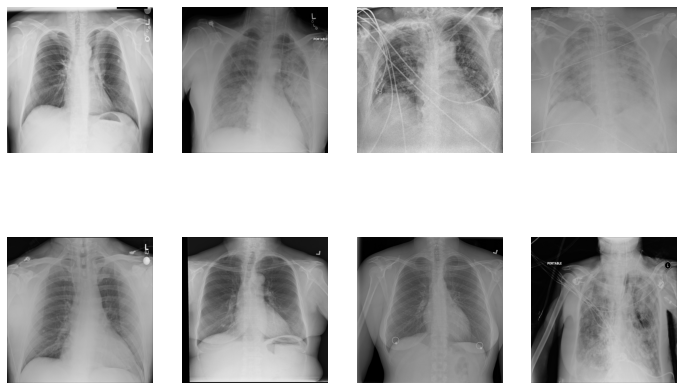

In [ ]:
base_dir = '/home/samuel/Dev/Python/Neural Networks/covid_net/COVID-Net/data'
train_dir = os.path.join(base_dir, 'train')
training_set = os.listdir(train_dir)
pyplot.figure(figsize=(12, 12))

for i in range(8):    
    image = np.random.choice(training_set)
    ax = pyplot.subplot(3, 4, i + 1)
    img = load_img(os.path.join(train_dir, image))
    pyplot.imshow(img)
    pyplot.axis("off")
    
pyplot.show()

# Sample With Gaussian Noise

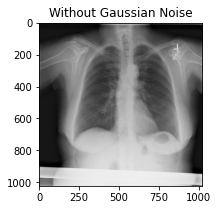

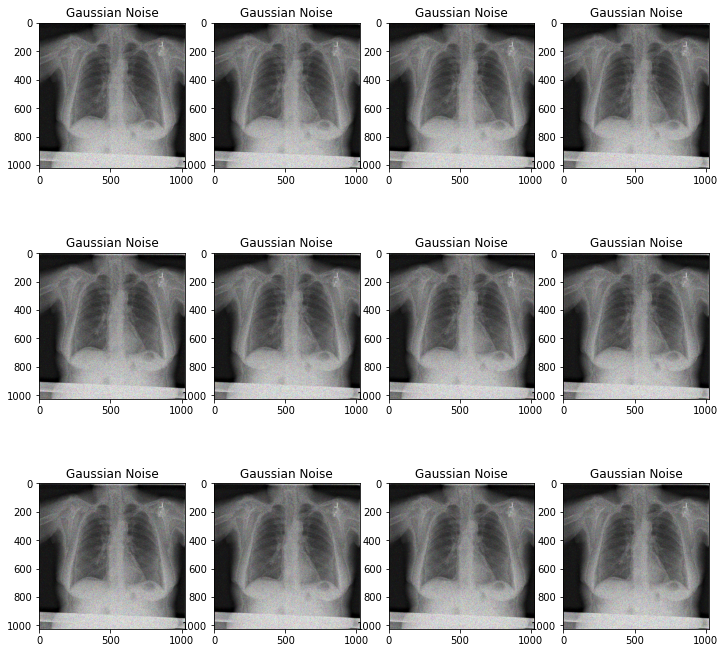

In [ ]:
image_name = np.random.choice(training_set)
img = load_img(os.path.join(train_dir, image_name))

pyplot.figure(figsize=(6, 3))
pyplot.title("Without Gaussian Noise")
pyplot.imshow(img)
pyplot.show()

pyplot.figure(figsize=(12, 12))

for i in range(12):
    ax = pyplot.subplot(3, 4, i + 1)
    gaussian_noise_image = gaussian_noise(
        train_dir, image_name
    )
    pyplot.title('Gaussian Noise')
    pyplot.imshow(gaussian_noise_image)

pyplot.show()


# Apply Gaussian Noise to All Training Data 

In [ ]:
temp_dir = 'temp'

def apply_gaussian_noise():

    if not os.path.exists(temp_dir):
        os.mkdir(temp_dir)

    print("Applying Gaussian Noise to the data...")
    for i, image in enumerate(training_set):
        print('\r[' + '*'*int((i * 100)/len(training_set)) + ' '*int(100 - ((i) * (100/len(training_set)))) + ']', end='')

        gaussian_noise_image = gaussian_noise(
            train_dir, image
        )
        cv2.imwrite(
            '{}'.format(os.path.join(temp_dir, image)),
            gaussian_noise_image
        )
    print("Ok.")




In [ ]:
apply_gaussian_noise()